# 0.데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [8]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
dlq = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DLQ.csv')             # 연체정보(금융회사, 대부회사)
pub = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_PUB.csv')             # 연체정보(공공기관)

ln = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN.csv')               # 개인대출정보(금융권)
ln_sp = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN_SP.csv')         # 개인대출정보(대부업권)

cd_opn = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_OPN.csv')       # 카드개설정보
cd_usg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_USG.csv')       # 카드이용정보

grnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_GRNT.csv')           # 채무보증정보

In [9]:
id = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_ID.csv')                   # 차주정보

rlps = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_RLPS.csv')            # 보험계약관계자정보
cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_CONT_PVT.csv')        # 보험계약정보
mgg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_MGG_PVT.csv')          # 보험담보정보

accd = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_ACCD.csv')            # 청구사고정보
claim_cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_CONT.csv')      # 청구계약정보
pmnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNT.csv')            # 청구지급사유정보
pmntdtl = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNTDTL.csv')      # 청구지급상세사유정보
vctm = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_VCTM.csv')            # 청구피해자물정보

In [ ]:
desc = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DESC.csv')                   # 기업정보

# 1. 데이터 확인

## 1-3. 보험계약정보

1. 기준년월과 주계약상태코드로 계약유지율 확인?
  * 납입 주기가 보험마다 달라서 기준년월로는 정확하지 않을 것 같음. 기준년월 없어도 될 듯
  * 추후에 사용법 다시 생각나면 그때 살리기
2. IS_GRP_INS(단체보험여부) : 단체보험인 경우는 개인 의지로 가입한 상품이 아니니 제외?
  * 이미 단체보험이 있으니 개인 보험이 필요 없어서 가입하지 않는 경우
  * 단체보험이 있어도 보험에 대한 무지 혹은 필요성으로 추가로 개인이 보험 가입하는 경우
  
  ... 등 이 있을 수도?
3. 증권번호가 보험계약관계자정보에서 추출한 정보와 일치하는 경우에만 사용 => 개인 건만 선택하기 위해
4. 증권번호, 보험종류 코드가 중복되는 행들이 많음 => 왜 중복 행들이 나타났는지 케이스 확인 필요
  * 딱히 사유는 모르겠지만, 중간에 월납 보험료가 달라지는 경우 중복으로 나타나기도 함
  * 기준년월 이용해서 전체기간 납입 보험료 확인...? 더 깊게 생각해 볼 것
5. 진단계약 컬럼 : 진단계약인 경우의 건수가 적음,

In [ ]:
cont

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,999912,10,2,1,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,999912,33,2,20,0,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,7995898,0,7,2,201409,999912,201409,999912,999912,999912,52,2,30,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,8,9743978,0,4,7,201604,201704,201604,201704,999912,999912,170,3,1,0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,9040681,0,4,2,201804,999912,201804,204804,999912,202006,43,2,25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,8,6242384,0,7,2,201212,999912,201212,203812,999912,999912,47,2,10,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368479,6,2265670,0,14,5,201604,999912,201604,201604,999912,999912,31,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368480,6,6050915,0,7,7,200902,201107,200902,201902,999912,999912,15,2,10,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368481,6,9901184,0,14,2,201809,999912,201809,201902,999912,999912,96,1,0,0,1,5,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cont.agg(['count', 'size', 'nunique'])

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
size,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
nunique,3,244232,2,18,10,163,181,163,1120,174,166,233,4,100,2,8,8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
cont[cont['POL_SN'] == 5893234]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
101191,6,5893234,0,14,5,201112,999912,201112,201112,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121351,6,5893234,0,14,5,201110,999912,201110,201110,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
143989,6,5893234,0,14,5,201111,999912,201111,201111,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
244215,6,5893234,0,14,5,201109,999912,201109,201109,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
244270,6,5893234,0,14,5,201108,999912,201108,201108,999912,999912,1000,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
cont[cont['POL_SN'] == 9997333]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
23749,8,9997333,0,5,2,201809,999912,201809,202309,999912,999912,41,2,5,0,1,4,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
110463,8,9997333,0,5,2,201309,999912,201309,201809,999912,999912,37,2,5,0,1,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dupl_cont = cont[cont.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_cont

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
199198,6,8,0,13,2,201806,999912,201806,203306,999912,999912,35,2,15,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
163457,6,8,0,13,2,201806,999912,201806,203306,201912,201912,35,2,15,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
212459,6,254,0,3,2,201006,999912,201006,209406,999912,999912,11,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
163799,6,254,0,3,2,201006,999912,201006,209406,999912,999912,8,2,20,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
222192,6,514,0,3,2,201802,999912,201802,208302,999912,999912,260,2,20,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241571,6,9997283,0,14,5,201607,999912,201608,201608,999912,999912,110,1,0,0,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
36289,6,9997320,0,7,3,201911,201912,201911,999912,999912,999912,81,2,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
321092,6,9997320,0,7,2,201911,999912,201911,999912,999912,999912,81,2,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23749,8,9997333,0,5,2,201809,999912,201809,202309,999912,999912,41,2,5,0,1,4,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<ipython-input-8-39958d48bb1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IS_GRP_INS', y='POL_SN', data=group1, palette='pastel')


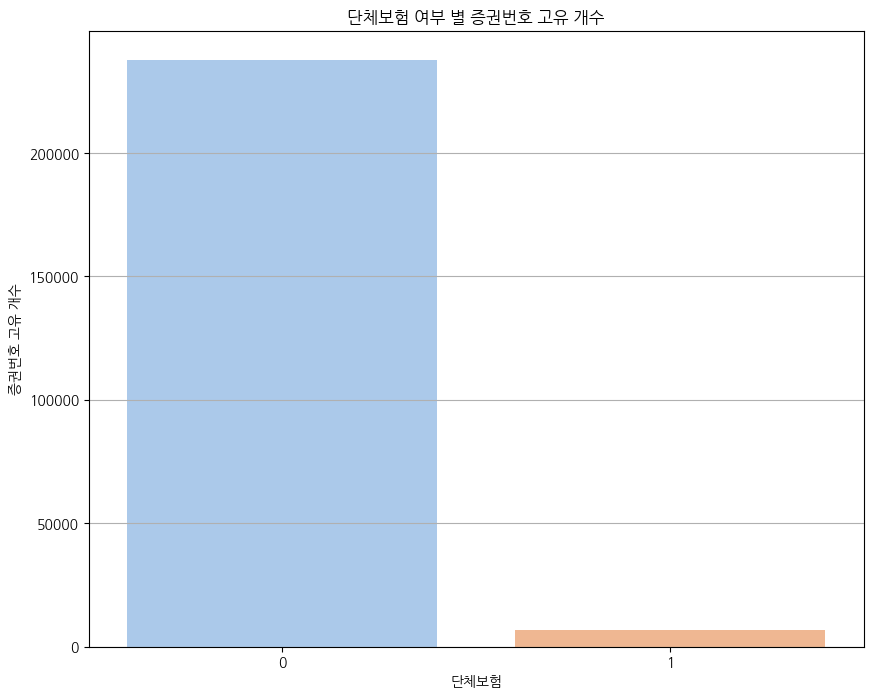

In [ ]:
group1 = cont.groupby('IS_GRP_INS')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='IS_GRP_INS', y='POL_SN', data=group1, palette='pastel')
plt.title('단체보험 여부 별 증권번호 고유 개수')
plt.xlabel('단체보험')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

<ipython-input-10-6e2ba1c75191>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='INS_GBN_CD', y='POL_SN', data=group2, palette='pastel')


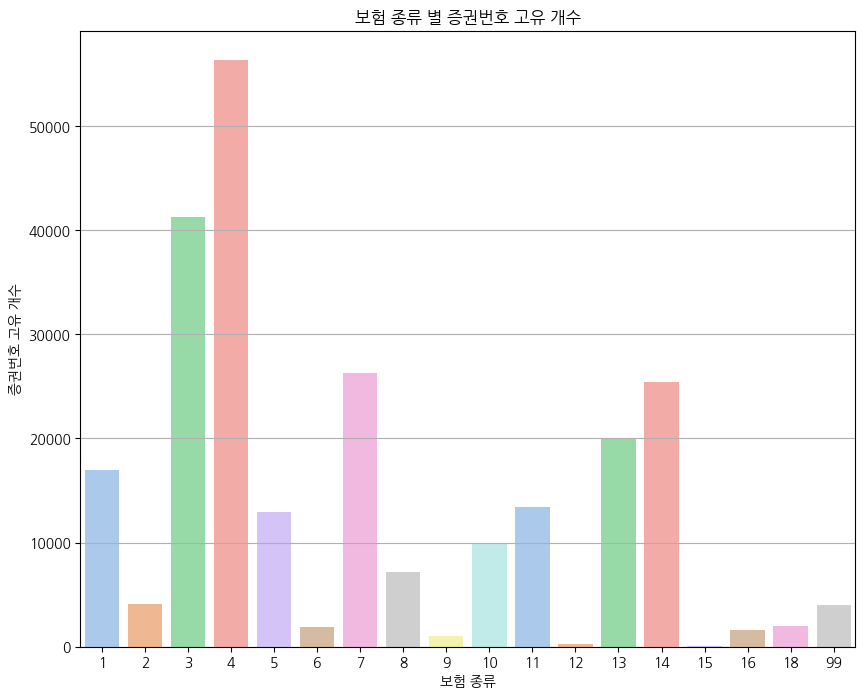

In [ ]:
group2 = cont.groupby('INS_GBN_CD')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='POL_SN', data=group2, palette='pastel')
plt.title('보험 종류 별 증권번호 고유 개수')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

<ipython-input-11-f3dff36dcace>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CT_CHNL_CD', y='POL_SN', data=group3, palette='pastel')


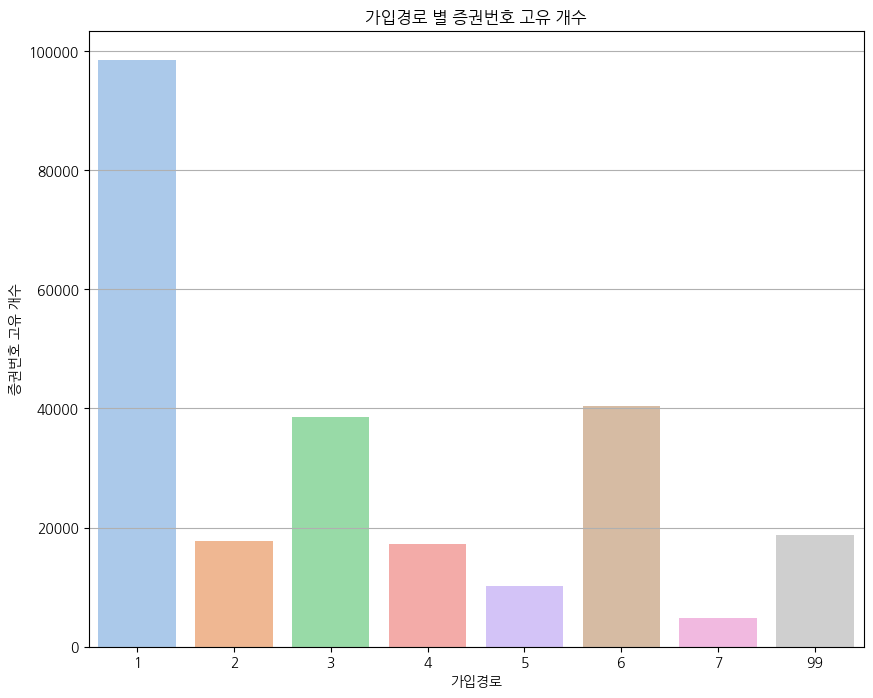

In [ ]:
group3 = cont.groupby('CT_CHNL_CD')['POL_SN'].nunique().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='CT_CHNL_CD', y='POL_SN', data=group3, palette='pastel')
plt.title('가입경로 별 증권번호 고유 개수')
plt.xlabel('가입경로')
plt.ylabel('증권번호 고유 개수')
plt.grid(axis='y')
plt.show()

In [ ]:
group4 = cont.groupby(['CT_CHNL_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

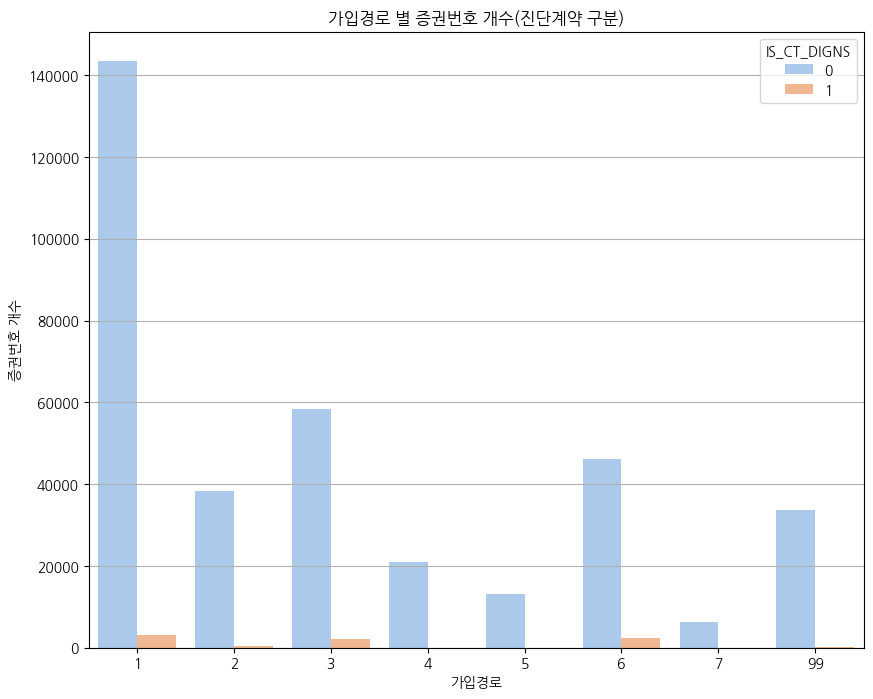

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='CT_CHNL_CD', y='counts', hue='IS_CT_DIGNS', data=group4, palette='pastel')
plt.title('가입경로 별 증권번호 개수(진단계약 구분)')
plt.xlabel('가입경로')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

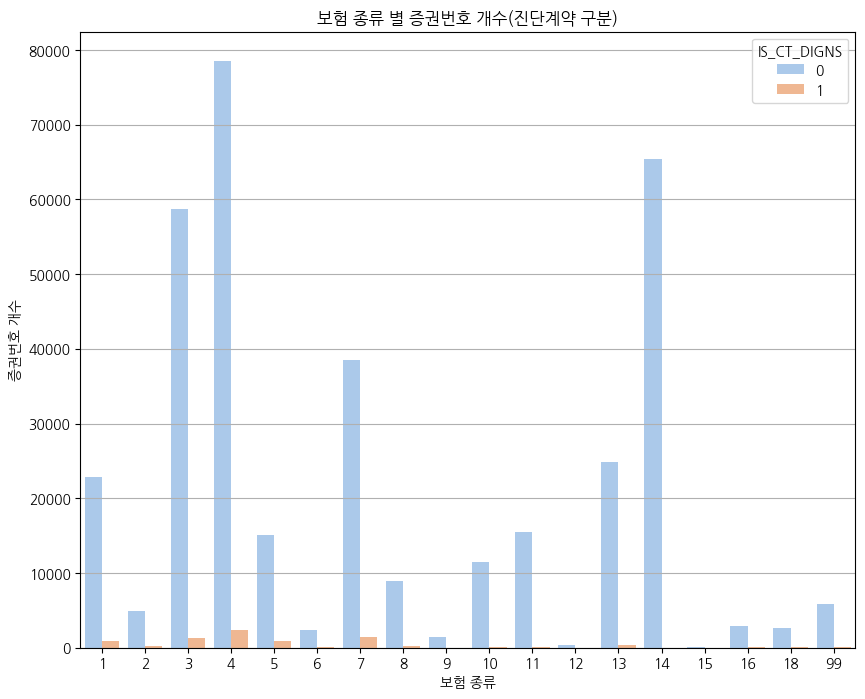

In [ ]:
group5 = cont.groupby(['INS_GBN_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='IS_CT_DIGNS', data=group5, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(진단계약 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

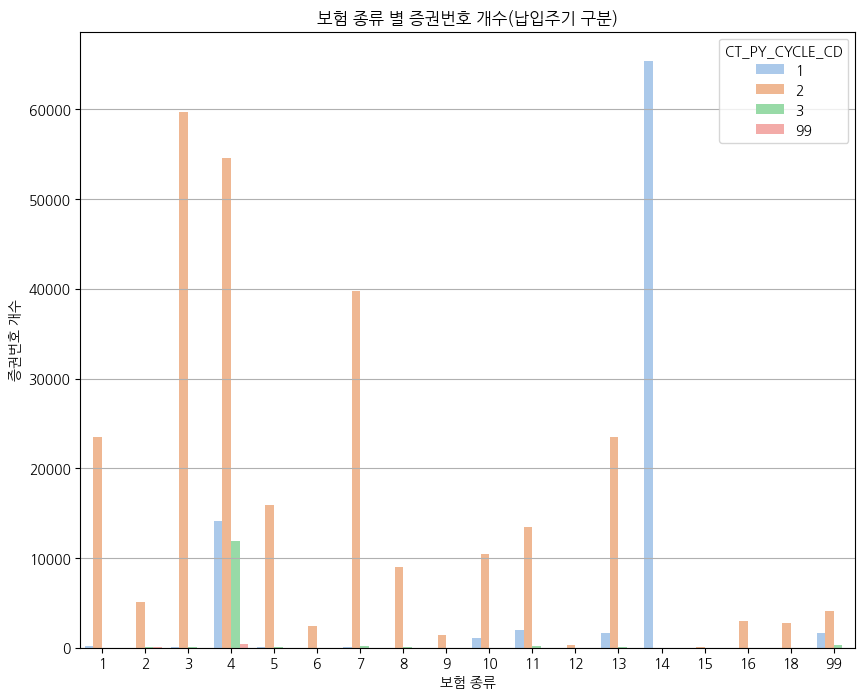

In [ ]:
group6 = cont.groupby(['INS_GBN_CD', 'CT_PY_CYCLE_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='CT_PY_CYCLE_CD', data=group6, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(납입주기 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

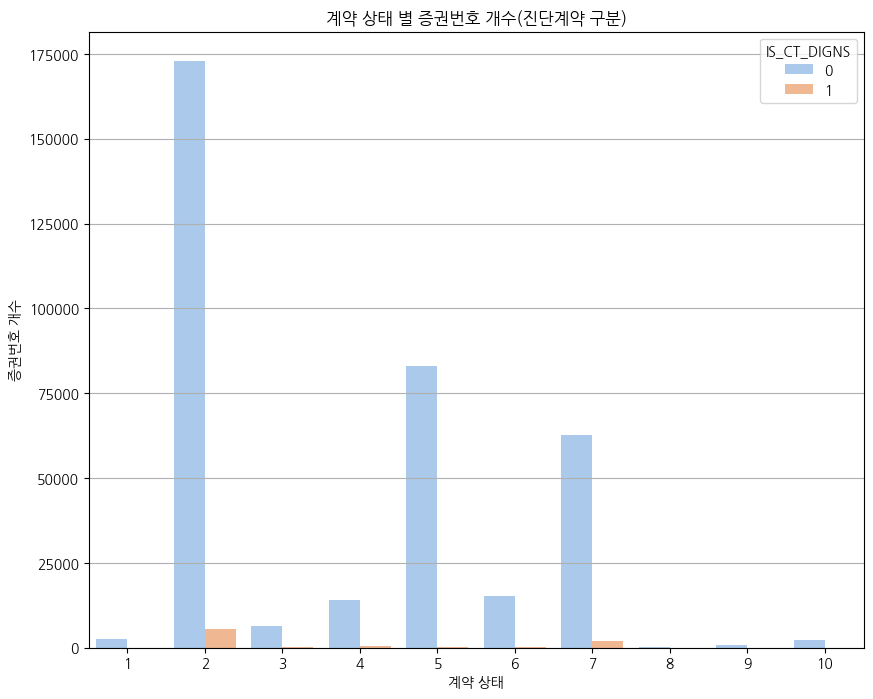

In [ ]:
group7 = cont.groupby(['INS_CT_STAT_CD', 'IS_CT_DIGNS']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_CT_STAT_CD', y='counts', hue='IS_CT_DIGNS', data=group7, palette='pastel')
plt.title('계약 상태 별 증권번호 개수(진단계약 구분)')
plt.xlabel('계약 상태')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

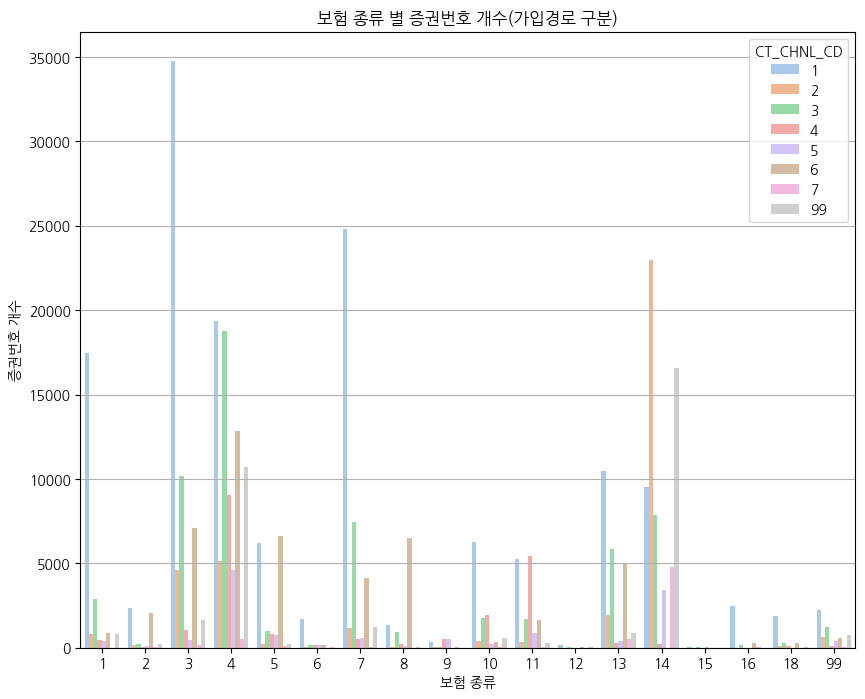

In [ ]:
group8 = cont.groupby(['INS_GBN_CD', 'CT_CHNL_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='INS_GBN_CD', y='counts', hue='CT_CHNL_CD', data=group8, palette='pastel')
plt.title('보험 종류 별 증권번호 개수(가입경로 구분)')
plt.xlabel('보험 종류')
plt.ylabel('증권번호 개수')
plt.grid(axis='y')
plt.show()

In [ ]:
cont[(cont['CT_PY_CYCLE_CD'] == 0)&(cont['CT_PY_PD']) == 1]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006


## 1-4. 보험담보정보

1. 군집별 선호하는 담보?

  * MGG_CD(담보코드) 보다는 MGG_GRP_CD(담보 그룹 코드)를 먼저 사용하는 걸 고려하는게 좋을 듯. 담보코드 140개로 너무 많음
  * 담보별 손해율 계산 불가
  * 보험사에서 다 짜놓은 담보 중에서 필수로 들어가는 담보는 당연히 빈도가 높을 수 밖에 없지 않나?
2. 차주일련번호, 증권번호가 보험계약관계자정보 혹은 보험계약정보에서 추출한 정보와 일치하는 경우에만 사용
3. 보험계약정보의 보험종류와 연계하여 보험종류별 담보 그룹/담보 코드를 보는 게 좋지 않을까?

In [ ]:
mgg

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,499723,1,6,3260523,A5,A5301,1,480,480,480,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,998541,1,6,1272317,A4,A4303,1,400,400,400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1778522,1,8,3094747,A1,A1400,1,20000,20000,20000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,1189610,1,6,7519869,A3,A3300,1,10000,10000,10000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1464515,1,6,1941349,A4,A4299,1,45000,45000,45000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408802,1737843,1,6,667896,A1,A1400,1,90000,90000,90000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408803,21056,1,6,1660383,A6,A6200,1,100,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408804,1537144,1,6,5663552,A3,A3300,1,9000,9000,9000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1408805,1608352,1,6,9919009,A4,A4102,1,4000,4000,4000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
p_mgg = mgg[mgg['JOIN_SN_TYP'] == 1]

In [ ]:
mgg.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
size,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
nunique,50143,1,3,115467,13,140,31,311,310,311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
p_mgg.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
size,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
nunique,50143,1,3,115467,13,140,31,311,310,311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
p_mgg['SCTR_CD'].unique()
# 업권 코드가 3 : 신협

array([6, 8, 3])

In [ ]:
dupl_mgg = p_mgg[p_mgg.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_mgg

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
230581,902434,1,6,8,A4,A4302,1,350,350,350,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
625905,902434,1,6,8,A5,A5399,2,15000,14000,1400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
307120,902434,1,6,8,A4,A4301,1,350,350,350,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
832586,902434,1,6,8,A5,A5301,1,490,490,490,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1296031,902434,1,6,8,A6,A6350,1,100,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716610,545697,1,6,9997320,A5,A5999,12,19000,8000,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
305233,545697,1,6,9997320,A4,A4199,6,34000,8000,240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
345685,545697,1,6,9997320,A4,A4210,1,8000,8000,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
956310,545697,1,6,9997320,A6,A6350,1,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<ipython-input-33-41fdef2ff8b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_GRP_CD', y='counts', data=gRoup1, palette='pastel')


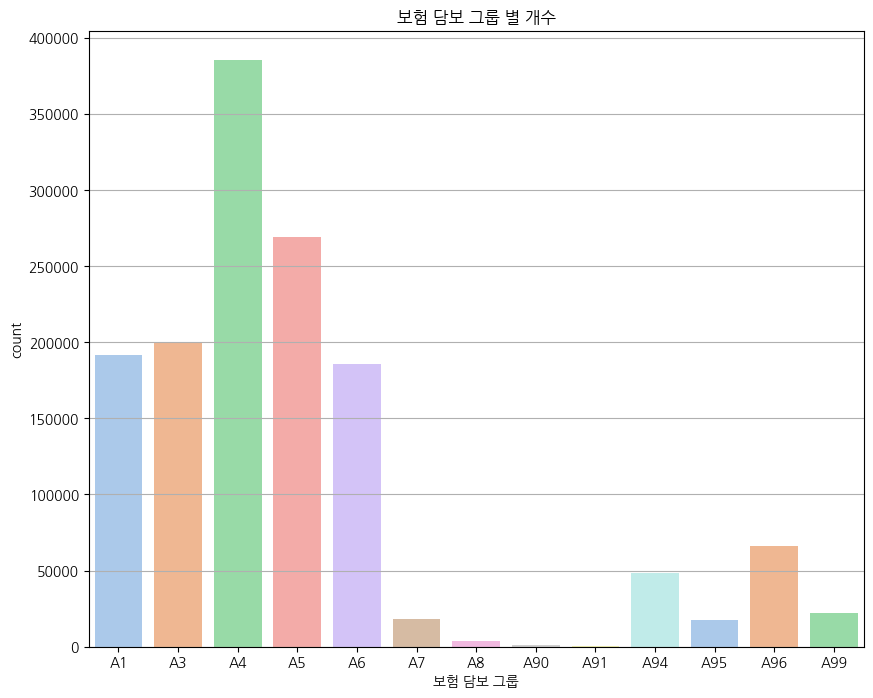

In [ ]:
gRoup1 = p_mgg.groupby(['MGG_GRP_CD']).size().reset_index(name='counts')

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_GRP_CD', y='counts', data=gRoup1, palette='pastel')
plt.title('보험 담보 그룹 별 개수')
plt.xlabel('보험 담보 그룹')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-34-56e47475ec49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a1_mgg, palette='pastel')


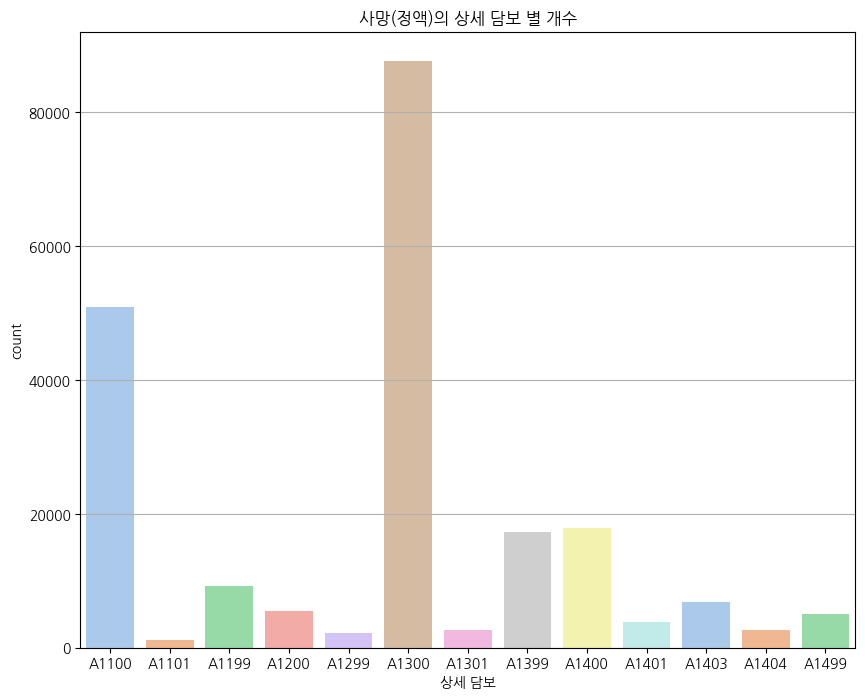

In [ ]:
a1 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A1']
a1_mgg = a1.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a1_mgg, palette='pastel')
plt.title('사망(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-35-a89e2a795797>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a3_mgg, palette='pastel')


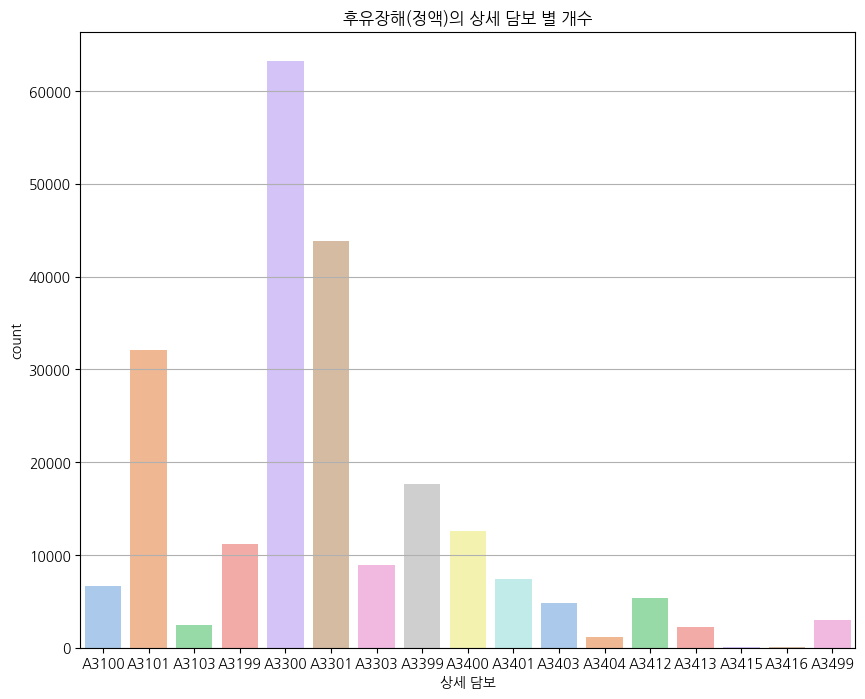

In [ ]:
a3 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A3']
a3_mgg = a3.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a3_mgg, palette='pastel')
plt.title('후유장해(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()

<ipython-input-37-f90bc0e4c66d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a4_mgg, palette='pastel')


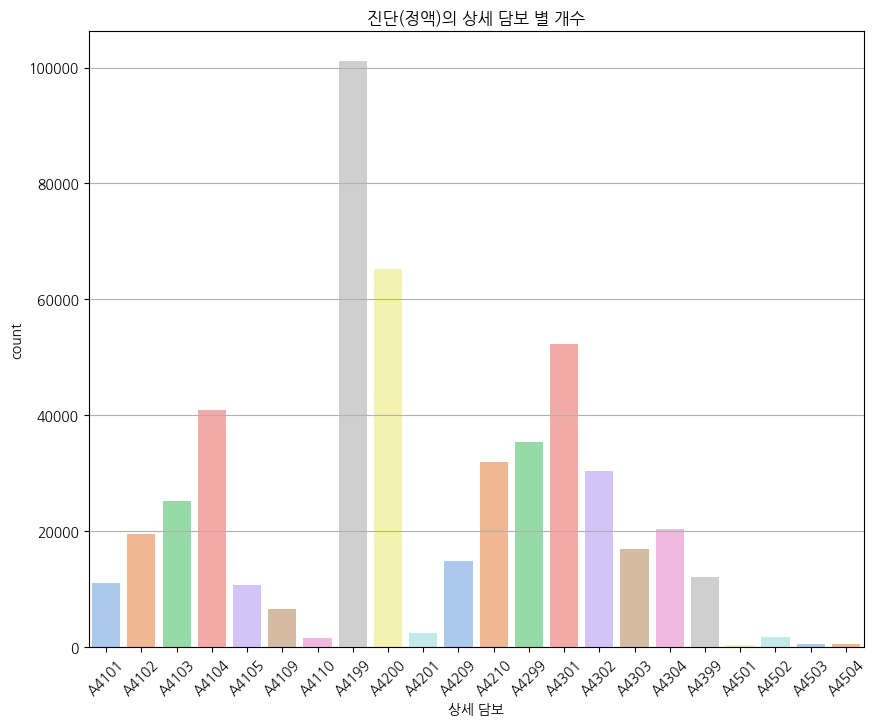

In [ ]:
a4 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A4']
a4_mgg = a4.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a4_mgg, palette='pastel')
plt.title('진단(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-6b61dc2733af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MGG_CD', y='MGG_CNT', data=a5_mgg, palette='pastel')


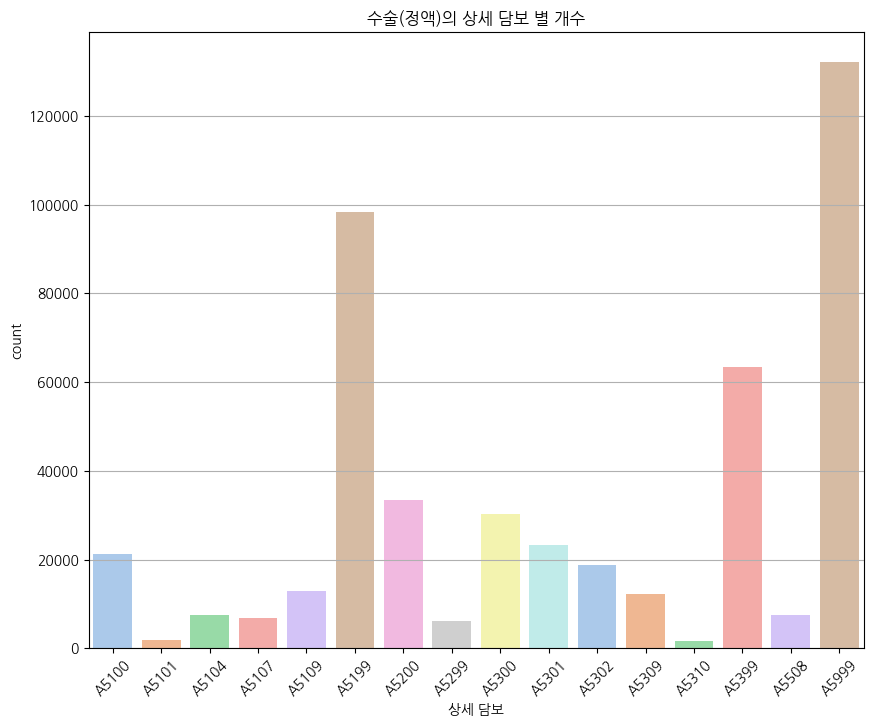

In [ ]:
a5 = p_mgg[p_mgg['MGG_GRP_CD'] == 'A5']
a5_mgg = a5.groupby(['MGG_CD'])['MGG_CNT'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='MGG_CD', y='MGG_CNT', data=a5_mgg, palette='pastel')
plt.title('수술(정액)의 상세 담보 별 개수')
plt.xlabel('상세 담보')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pivot_mgg = p_mgg.pivot_table(index='POL_SN', columns='MGG_GRP_CD', aggfunc='size', fill_value=0)

pivot_mgg

MGG_GRP_CD,A1,A3,A4,A5,A6,A7,A8,A90,A91,A94,A95,A96,A99
POL_SN,,,,,,,,,,,,,
8,2,1,3,4,3,1,0,0,0,1,0,2,0
111,2,3,3,4,3,0,0,0,0,0,0,0,0
179,2,1,2,2,2,0,0,0,0,0,0,0,0
311,2,2,2,1,2,0,0,0,0,0,0,0,0
478,0,2,10,12,8,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997129,2,1,1,0,0,0,0,0,0,0,0,0,1
9997240,2,1,0,0,0,0,0,0,0,0,0,0,0
9997274,0,0,3,0,0,0,0,0,0,0,0,0,0


In [ ]:
pivot_mgg2 = pd.DataFrame(pivot_mgg)
pivot_mgg2

MGG_GRP_CD,A1,A3,A4,A5,A6,A7,A8,A90,A91,A94,A95,A96,A99
POL_SN,,,,,,,,,,,,,
8,2,1,3,4,3,1,0,0,0,1,0,2,0
111,2,3,3,4,3,0,0,0,0,0,0,0,0
179,2,1,2,2,2,0,0,0,0,0,0,0,0
311,2,2,2,1,2,0,0,0,0,0,0,0,0
478,0,2,10,12,8,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997129,2,1,1,0,0,0,0,0,0,0,0,0,1
9997240,2,1,0,0,0,0,0,0,0,0,0,0,0
9997274,0,0,3,0,0,0,0,0,0,0,0,0,0


In [ ]:
cross = pd.crosstab(pivot_mgg['A1'], pivot_mgg['POL_SN'])
cross

KeyError: 'POL_SN'

In [ ]:
p_mgg[p_mgg['POL_SN'] == 9997320]

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
171482,545697,1,6,9997320,A5,A5301,1,800,800,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
253440,545697,1,6,9997320,A4,A4303,1,2400,2400,2400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
270925,545697,1,6,9997320,A96,A9601,1,160,160,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296986,545697,1,6,9997320,A5,A5199,2,20000,16000,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
305233,545697,1,6,9997320,A4,A4199,6,34000,8000,240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
339047,545697,1,6,9997320,A5,A5107,1,8000,8000,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
342907,545697,1,6,9997320,A6,A6300,1,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
345685,545697,1,6,9997320,A4,A4210,1,8000,8000,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
358561,545697,1,6,9997320,A6,A6302,1,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
382755,545697,1,6,9997320,A3,A3100,1,10000,10000,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 1-4.5. 청구사유정보

1. 차주일련번호만 사용

In [ ]:
accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0
2,67340,1,6,5144128,0,797919,672190,1,23,202006,202006,23,99
3,1790965,1,3,8278365,0,1132823,1609635,1,38,201904,201904,99,0
4,980616,1,6,8670561,0,673077,566526,1,11,201911,202003,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,470724,1,8,275275,0,1252459,1431063,1,25,201901,201906,99,0
41343,81437,1,6,8020811,0,2130087,1794822,1,33,202001,202001,99,0
41344,689368,1,6,6513234,0,376683,547171,1,99,201806,201807,99,0
41345,263114,1,3,1108441,0,76699,672689,1,39,201909,202003,99,0


In [19]:
p_accd = accd[accd['JOIN_SN_TYP'] == 1]

In [ ]:
accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [ ]:
p_accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [ ]:
dupl_accd = p_accd[p_accd.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD


## 1-5. 청구지급사유정보

1. 청구사유정보 테이블과 사고번호+청구번호가 일치하면 청구사유정보 테이블에서 차주일련번호 가져오기

In [10]:
pmnt

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11
2,2715,1162881,6,8072495,17,3152,C1008,201901,1,11
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1
...,...,...,...,...,...,...,...,...,...,...
67794,302072,1756207,6,7106786,4,23,B2002,201904,0,1
67795,144869,122001,6,3737241,4,2199,A9999,201808,0,3
67796,1029524,867235,6,8830641,3,1930,B2002,201901,0,1
67797,1189558,592357,8,7362949,3,2947,A1009,201905,0,1


In [23]:
pmnt.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
count,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
size,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
nunique,38742,32798,3,25277,19,368,50,25,2,8


In [21]:
pmnt_merge = pd.merge(pmnt, p_accd[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmnt_merge

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1,943833
1,1433170,1818958,6,9641244,4,2547,A1006,202005,0,1,943833
2,797449,671787,6,5047760,17,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,17,2456,C1009,201807,1,13,1941009
4,2715,1162881,6,8072495,17,3152,C1008,201901,1,11,503856
...,...,...,...,...,...,...,...,...,...,...,...
67792,2265910,955442,6,1558111,4,1476,B2002,201901,0,1,439991
67793,1188714,1001209,6,6886821,17,1932,C1008,201807,1,11,365091
67794,2218121,1127169,8,7431894,3,652,B2005,201905,0,1,477072
67795,1189558,592357,8,7362949,3,2947,A1009,201905,0,1,1537577


In [22]:
pmnt_merge.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
count,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
size,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
nunique,38742,32798,3,25276,19,368,50,25,2,8,17230


In [24]:
pmnt_group = pmnt_merge.groupby(['POL_SN'])['ACCD_SN'].nunique().reset_index()
pmnt_group

,POL_SN,ACCD_SN
0,344,1
1,928,1
2,1092,1
3,1308,2
4,1616,6
...,...,...
25271,9994312,3
25272,9994891,1
25273,9995087,5
25274,9995671,5


In [25]:
pmnt_merge[pmnt_merge['POL_SN'] == 1616]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
17416,1762371,1484916,6,1616,4,665,B2002,201911,0,1,378480
17417,1762371,1484916,6,1616,4,665,B2002,201911,0,1,378480
17418,1762371,1484916,6,1616,4,665,B2002,201912,0,1,378480
26829,437863,368200,6,1616,4,665,B2006,201812,0,1,378480
26830,437863,368200,6,1616,4,665,B2006,201812,0,1,378480
49027,1983124,1671179,6,1616,4,665,B2006,201911,0,1,378480
54370,1189143,1001576,6,1616,4,665,B2006,201912,0,1,378480
60518,1253313,1055699,6,1616,4,665,B2002,201911,0,1,378480
65344,956804,805752,6,1616,4,665,B2002,201806,0,1,378480


In [29]:
pmnt_group1 = pmnt_merge.groupby(['PMNT_RESN_CD','PMNT_JDGMNT_CD']).size().reset_index(name='counts')

,PMNT_RESN_CD,PMNT_JDGMNT_CD,counts
0,A1001,1,201
1,A1001,3,2
2,A1002,1,13
3,A1002,3,1
4,A1003,1,20
...,...,...,...
141,D9999,13,1
142,D9999,21,3
143,E9999,11,349
144,E9999,13,3


In [35]:
pmnt_group0 = pmnt_merge.groupby(['PMNT_RESN_CD']).size().reset_index(name='counts')

<ipython-input-36-4af79b82d7b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_RESN_CD', y='counts', data=pmnt_group0, palette='pastel')


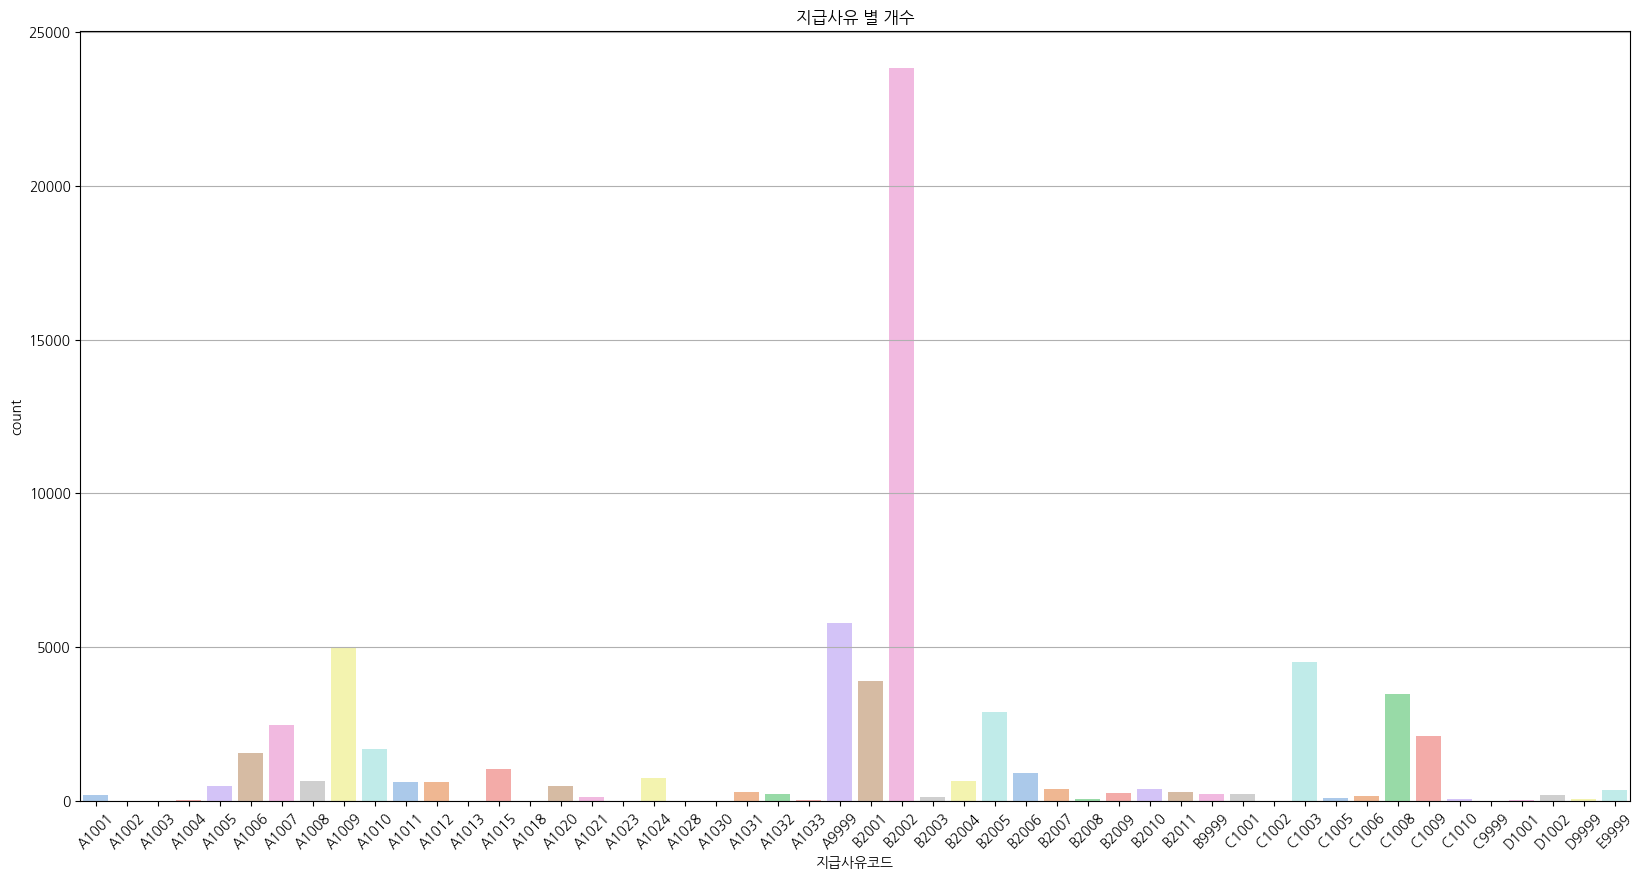

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', data=pmnt_group0, palette='pastel')
plt.title('지급사유 별 개수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

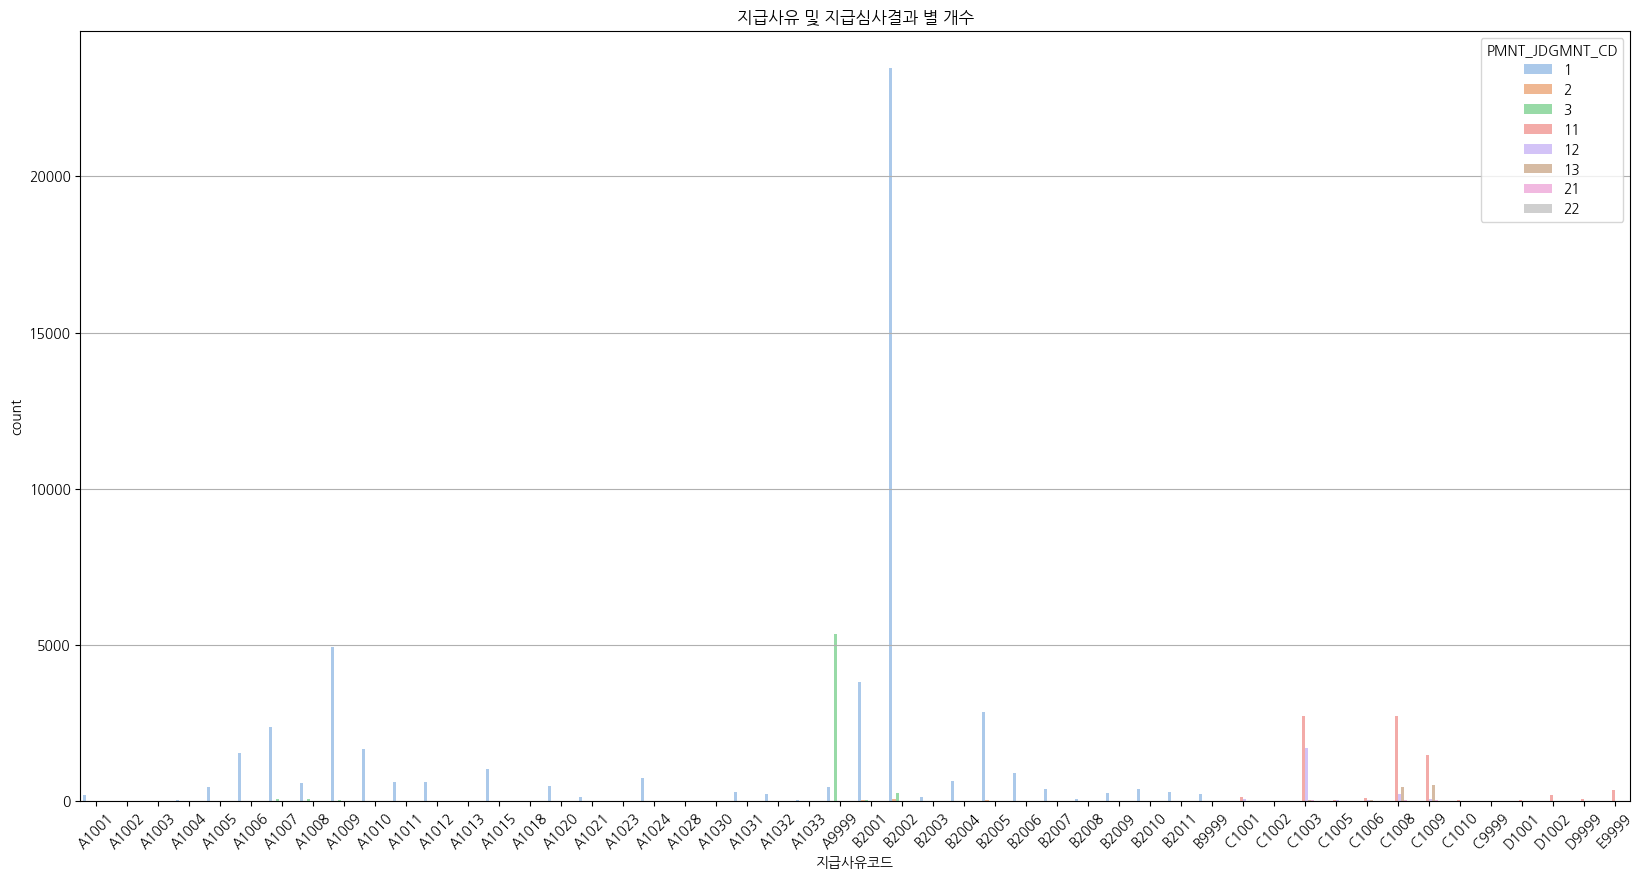

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', hue='PMNT_JDGMNT_CD', data=pmnt_group1, palette='pastel')
plt.title('지급사유 및 지급심사결과 별 개수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-6092dc72b33b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_JDGMNT_CD', y='counts', data=pmnt_group2, palette='pastel')


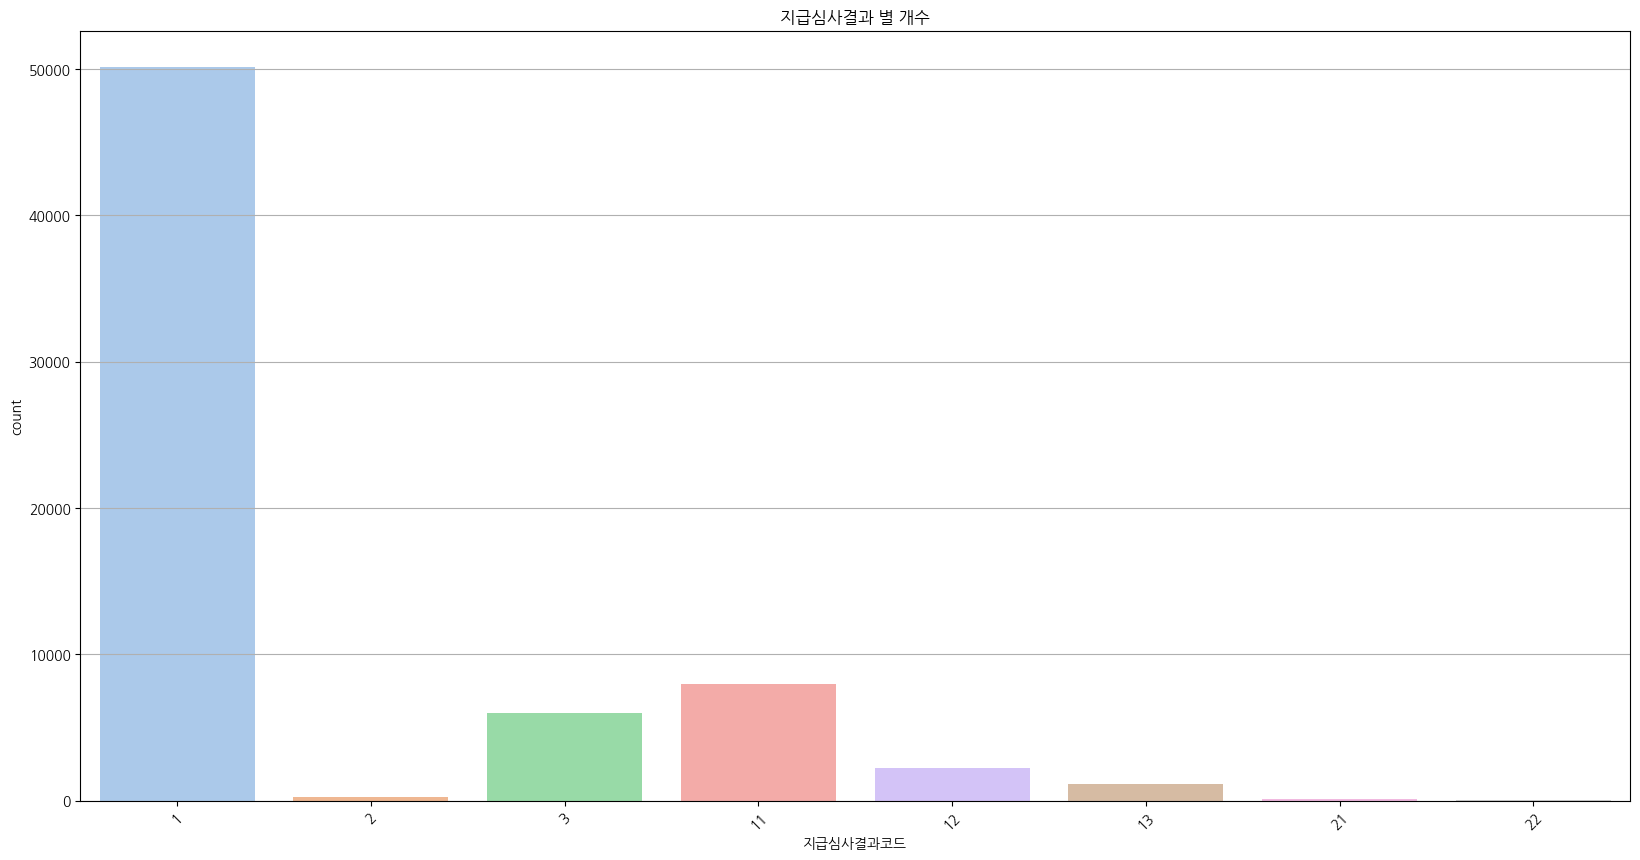

In [38]:
pmnt_group2 = pmnt_merge.groupby(['PMNT_JDGMNT_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_JDGMNT_CD', y='counts', data=pmnt_group2, palette='pastel')
plt.title('지급심사결과 별 개수')
plt.xlabel('지급심사결과코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

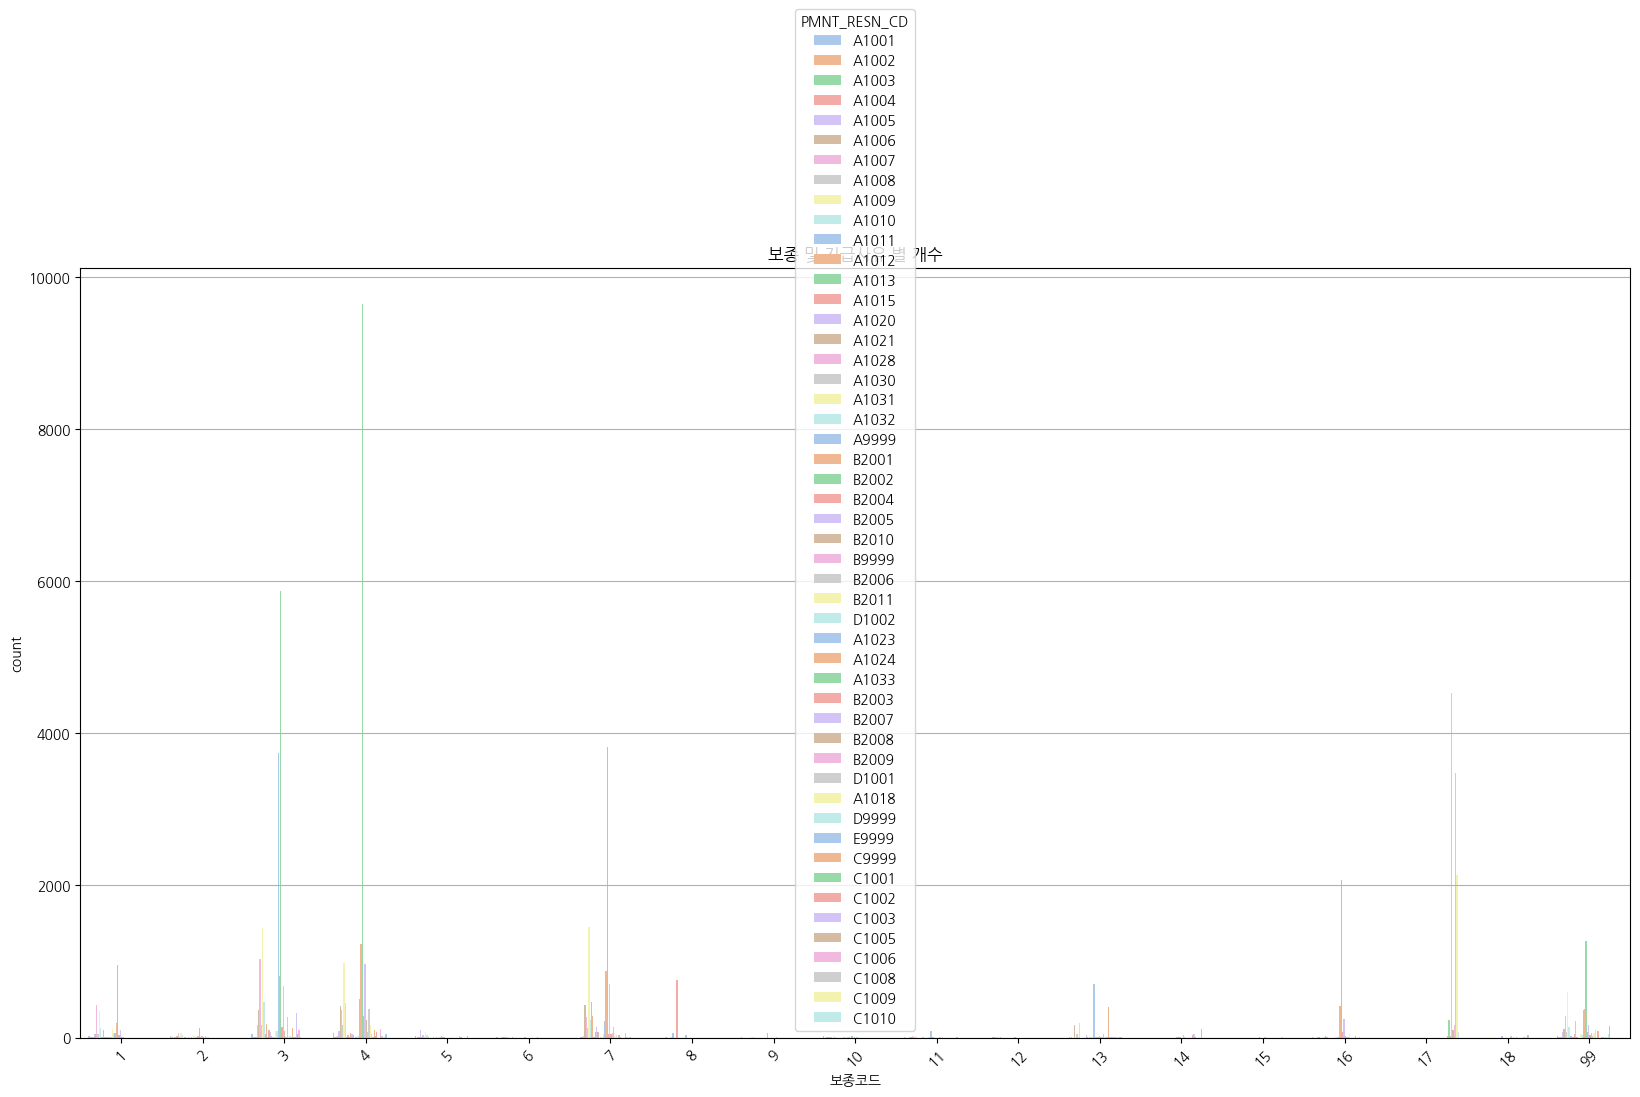

In [40]:
pmnt_group3 = pmnt_merge.groupby(['INS_GBN_CD', 'PMNT_RESN_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='INS_GBN_CD', y='counts', hue='PMNT_RESN_CD', data=pmnt_group3, palette='pastel')
plt.title('보종 및 지급사유 별 개수')
plt.xlabel('보종코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-8052a14cfed6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='INS_GBN_CD', y='counts', data=pmnt_group4, palette='pastel')


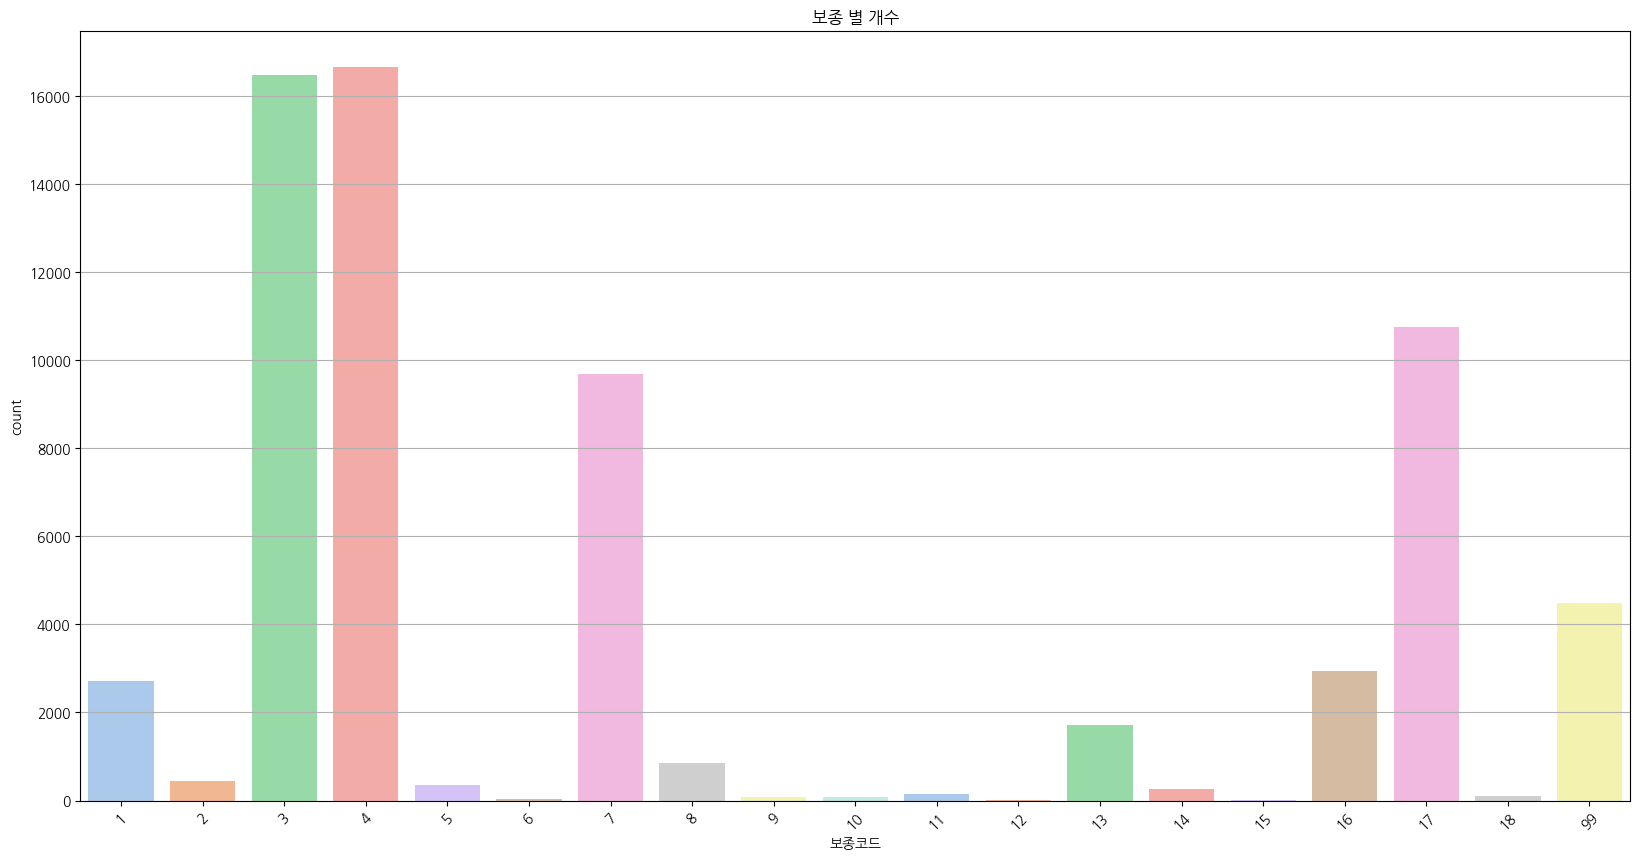

In [42]:
pmnt_group4 = pmnt_merge.groupby(['INS_GBN_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='INS_GBN_CD', y='counts', data=pmnt_group4, palette='pastel')
plt.title('보종 별 개수')
plt.xlabel('보종코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [55]:
pmnt_merge[(pmnt_merge['ACCD_SN'] == 797449) & (pmnt_merge['REQ_SN'] == 671787)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
2,797449,671787,6,5047760,17,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,17,2456,C1009,201807,1,13,1941009


In [57]:
pmnt_merge[(pmnt_merge['ACCD_SN'] == 273316) & (pmnt_merge['REQ_SN'] == 229516)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
1581,273316,229516,6,1679814,17,1958,C1008,201807,1,13,1628751


## 1-6. 청구지급사유상세정보

1. 지급사유코드 말고 지급상세사유코드만 사용은 어떨지?
2. VCTM_SN(피해자물일련번호) : 삭제
3. 보험금 지급 금액이 0이면 청구 건수에서 삭제
4. 보험금 지급 금액이 음수이면 환수 건으로, 총 보험금 지급 금액에는 합산하고 청구 건수에서는 삭제하는게 타당해보임


In [ ]:
pmntdtl

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600
3,122531,103007,6,7984136,665,B2001,202002,1,1,1300
4,1740460,1466487,6,3332223,3298,B2002,201909,1,1,200
...,...,...,...,...,...,...,...,...,...,...
71244,385388,324468,6,7894826,665,B2002,201910,1,1,170
71245,1410627,1754272,6,6915229,2547,B2002,201811,1,1,11
71246,430262,619986,6,7199202,2547,B2002,201809,1,1,78
71247,2253620,669803,6,5925060,2547,B2001,201807,1,1,1200


In [ ]:
pmntdtl.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
size,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
nunique,37890,31945,3,24719,356,50,25,12,13,273


In [26]:
pmntdtl_merge = pd.merge(pmntdtl, p_accd[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmntdtl_merge

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...
71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


In [27]:
pmntdtl_merge.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
count,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
size,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
nunique,37889,31945,3,24718,356,50,25,12,13,273,16965


In [13]:
dupl_pmntdtl1 = pmntdtl[pmntdtl.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_pmntdtl1

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
18593,562305,473114,6,928,2059,C1009,201909,14,1,510
66455,562305,473114,6,928,2059,C1009,201909,14,3,1500
43208,562305,473114,6,928,2059,C1009,201909,14,2,520
8141,1016428,1164318,6,1308,23,B2005,201912,1,1,18
40272,1723970,358795,6,1308,23,B2002,201912,1,1,16
...,...,...,...,...,...,...,...,...,...,...
10049,1493448,547171,6,9995671,2001,B2002,201808,1,1,250
21566,1493448,1337217,6,9995671,2001,B2002,201912,1,1,65
29662,2024792,547171,6,9995671,2001,B2002,202006,1,1,65
44821,1205868,1337217,6,9995671,2001,B2002,201912,1,1,38


In [ ]:
dupl_pmntdtl2 = pmntdtl[pmntdtl.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_pmntdtl2

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
50527,32,1602585,6,2224046,2547,A1020,201907,1,1,39
67265,32,1602585,6,2224046,2547,B2005,201907,1,1,76
32340,58,42,6,6438304,2040,B2002,202005,1,1,58
29344,58,42,6,6438304,2040,B2002,202005,1,1,120
8454,362,955442,6,2650623,1476,B2001,201902,1,1,100
...,...,...,...,...,...,...,...,...,...,...
51606,2302099,1939578,6,4383405,2199,B2007,202001,1,1,35
8503,2302211,679643,6,4722373,23,A1009,201806,1,1,65
3908,2302211,679643,6,4722373,23,B2001,201806,1,1,380
29787,2302234,1939682,6,5841131,2199,B2001,201903,1,1,89


<ipython-input-54-a929175b78ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_RESN_DTL_CD', y='PMNT_RESN_CD', data=pmntdtl_group1, palette='pastel')


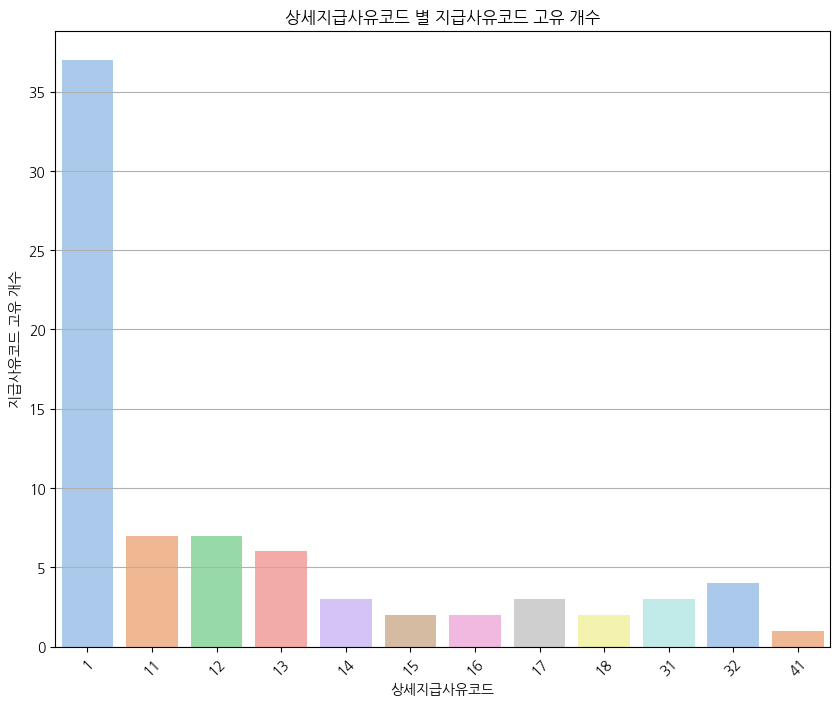

In [54]:
pmntdtl_group1 = pmntdtl_merge.groupby(['PMNT_RESN_DTL_CD'])['PMNT_RESN_CD'].nunique().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x='PMNT_RESN_DTL_CD', y='PMNT_RESN_CD', data=pmntdtl_group1, palette='pastel')
plt.title('상세지급사유코드 별 지급사유코드 고유 개수')
plt.xlabel('상세지급사유코드')
plt.ylabel('지급사유코드 고유 개수')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [44]:
pmntdtl_group1

,PMNT_RESN_DTL_CD,PMNT_RESN_CD
0,1,37
1,11,7
2,12,7
3,13,6
4,14,3
5,15,2
6,16,2
7,17,3
8,18,2
9,31,3


In [45]:
uniq = pmntdtl_merge.groupby('PMNT_RESN_DTL_CD')['PMNT_RESN_CD'].unique()
uniq

PMNT_RESN_DTL_CD
1     [A1001, B2001, B2002, A1009, B2005, B9999, A99...
11    [C1003, C1006, C1005, C1001, C1010, C1002, C9999]
12    [C1003, C1006, C1001, C1010, C1005, C1002, C9999]
13           [C1003, C1001, C1005, C1010, C1006, C9999]
14                                [C1008, C1009, C1010]
15                                       [C1008, C1009]
16                                       [C1008, C1009]
17                                [C1008, C1010, C1009]
18                                       [C1008, C1009]
31                                [D1001, D1002, D9999]
32                         [D1001, D1002, D9999, C9999]
41                                              [E9999]
Name: PMNT_RESN_CD, dtype: object

In [46]:
for i, j in uniq.items():
  print('상세지급사유코드 ', str(i), ': ', ', '.join(j) )

상세지급사유코드  1 :  A1001, B2001, B2002, A1009, B2005, B9999, A9999, B2004, B2006, A1010, A1007, A1012, A1024, A1008, A1006, A1005, B2007, A1020, B2009, B2010, B2011, A1013, A1004, A1015, A1032, A1021, A1011, B2003, A1031, B2008, A1018, A1033, A1002, A1030, A1023, A1003, A1028
상세지급사유코드  11 :  C1003, C1006, C1005, C1001, C1010, C1002, C9999
상세지급사유코드  12 :  C1003, C1006, C1001, C1010, C1005, C1002, C9999
상세지급사유코드  13 :  C1003, C1001, C1005, C1010, C1006, C9999
상세지급사유코드  14 :  C1008, C1009, C1010
상세지급사유코드  15 :  C1008, C1009
상세지급사유코드  16 :  C1008, C1009
상세지급사유코드  17 :  C1008, C1010, C1009
상세지급사유코드  18 :  C1008, C1009
상세지급사유코드  31 :  D1001, D1002, D9999
상세지급사유코드  32 :  D1001, D1002, D9999, C9999
상세지급사유코드  41 :  E9999


In [53]:
pmntcd = pmntdtl_merge[['PMNT_RESN_DTL_CD', 'PMNT_RESN_CD']]

pivot_dtl1 = pmntcd.pivot_table(index='PMNT_RESN_DTL_CD', columns='PMNT_RESN_CD', aggfunc='size', fill_value=0)
pivot_dtl1

PMNT_RESN_CD,A1001,A1002,A1003,A1004,A1005,A1006,A1007,A1008,A1009,A1010,A1011,A1012,A1013,A1015,A1018,A1020,A1021,A1023,A1024,A1028,A1030,A1031,A1032,A1033,A9999,B2001,B2002,B2003,B2004,B2005,B2006,B2007,B2008,B2009,B2010,B2011,B9999,C1001,C1002,C1003,C1005,C1006,C1008,C1009,C1010,C9999,D1001,D1002,D9999,E9999
PMNT_RESN_DTL_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,202,14,22,52,490,1539,2519,646,5035,1685,643,627,18,1051,19,502,129,14,717,9,21,304,244,30,5650,3950,23912,140,672,2889,897,380,58,265,399,301,253,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,20,3047,56,81,0,0,31,11,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,3,1358,8,56,0,0,14,8,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,308,14,6,0,0,7,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3029,1834,3,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,439,63,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,470,1,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,525,1,1,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1864,795,0,0,0,0,0,0


In [48]:
pmntcd = pmntdtl_merge[['PMNT_RESN_DTL_CD', 'PMNT_RESN_CD']]

pivot_dtl2 = pmntcd.pivot_table(index='PMNT_RESN_DTL_CD', columns='PMNT_RESN_CD', aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0)
# aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0

pivot_dtl2

PMNT_RESN_CD,A1001,A1002,A1003,A1004,A1005,A1006,A1007,A1008,A1009,A1010,A1011,A1012,A1013,A1015,A1018,A1020,A1021,A1023,A1024,A1028,A1030,A1031,A1032,A1033,A9999,B2001,B2002,B2003,B2004,B2005,B2006,B2007,B2008,B2009,B2010,B2011,B9999,C1001,C1002,C1003,C1005,C1006,C1008,C1009,C1010,C9999,D1001,D1002,D9999,E9999
PMNT_RESN_DTL_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [56]:
pmntdtl_merge[(pmntdtl_merge['ACCD_SN'] == 797449) & (pmntdtl_merge['REQ_SN'] == 671787)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
17319,797449,671787,6,5047760,260,C1008,201808,15,1,250,1941009
17320,797449,671787,6,5047760,260,C1008,201808,14,2,350,1941009
17321,797449,671787,6,5047760,260,C1008,201808,14,1,450,1941009
17322,797449,671787,6,5047760,260,C1008,201808,16,1,230,1941009


In [58]:
pmntdtl_merge[(pmntdtl_merge['ACCD_SN'] == 273316) & (pmntdtl_merge['REQ_SN'] == 229516)]


,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
